### 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib

### 02. Importing dataframe

In [2]:
df_final = pd.read_pickle(r'C:\Users\veren\Python Data\26-10-2021 Instacart Basket Analysis\02 Data\Prepared Data\final_complete_end.pkl')

In [3]:
df_final.shape

(29329778, 36)

In [4]:
pd.options.display.max_columns = None
df_final.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,gender,state,age,date_joined,n_dependants,family_status,income,region,exclusion_flag,age_group,income_range,department,day_of_week
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,Mid-range product,Regularly busy,Regularly busy,Most Orders,32,Regular customer,6.769286,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Non-low-activity Customer,65+,25.000-50.000,snacks,Friday
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,Mid-range product,Regularly busy,Regularly busy,Most Orders,32,Regular customer,6.769286,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Non-low-activity Customer,65+,25.000-50.000,snacks,Friday
2,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,1,1,High-range product,Regularly busy,Regularly busy,Most Orders,32,Regular customer,6.769286,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Non-low-activity Customer,65+,25.000-50.000,meat & seafood,Thursday
3,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,5,0,Mid-range product,Regularly busy,Regularly busy,Most Orders,32,Regular customer,6.769286,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Non-low-activity Customer,65+,25.000-50.000,bulk,Friday
4,3265,Mini Seedless Watermelon Pack,32,4,1.7,960220,138,17,5,14,19.0,1,0,Low-range product,Regularly busy,Regularly busy,Most Orders,32,Regular customer,6.769286,Low Spender,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,Non-low-activity Customer,65+,25.000-50.000,produce,Thursday


### 03. Visualizations

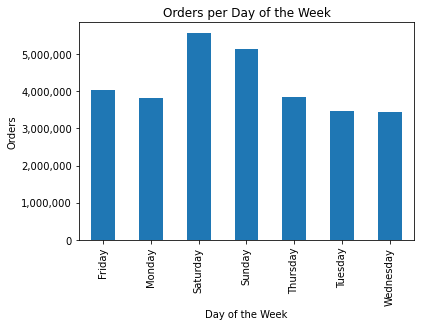

In [5]:
# Creating a bar chart for "day_of_week" with titles and labels for the axes and thousand separators

ax=df_final.groupby(['day_of_week']).size().plot.bar()
plt.title('Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Orders')
plt.ticklabel_format(style='plain', axis='y') 
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

In [6]:
# Exporting the chart
path = r'C:\Users\veren\Python Data\26-10-2021 Instacart Basket Analysis'

In [7]:
ax.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Revisions', 'final_bar_orders_dow.png'))

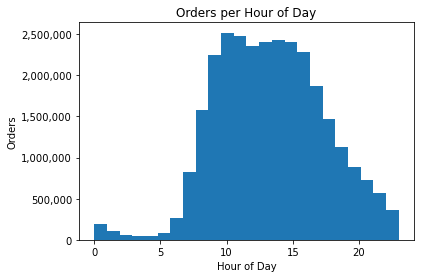

In [8]:
# Creating a histogram for "order_hour_of_day" with titles, labels for the axes and thousands separator 
ax2 = df_final['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Orders per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Orders')
plt.ticklabel_format(style='plain', axis='y')
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

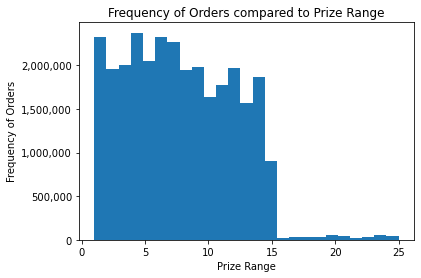

In [10]:
# Creating a bar chart for "prices" with titles, labels for the axes and thousands separator 
ax3 = df_final['prices'].plot.hist(bins = 25)
plt.title('Frequency of Orders compared to Prize Range')
plt.xlabel('Prize Range')
plt.ylabel('Frequency of Orders')
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Text(0.5, 1.0, 'Percentage of Customers per Region')

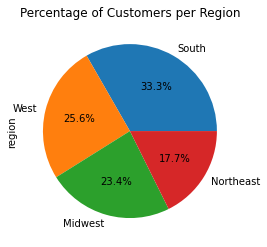

In [12]:
# Creating a pie chart for orders per region with a title
pie_ords_region = df_final['region'].value_counts().plot.pie(autopct= '%1.1f%%', colors = sns.color_palette())
plt.title('Percentage of Customers per Region')

Text(0.5, 1.0, 'Customer Loyalty')

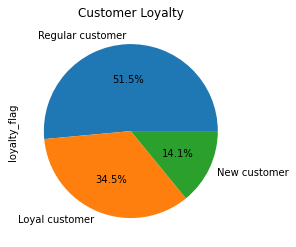

In [13]:
# Creating a pie chart for loyalty_flag with a title
pie_ords_region = df_final['loyalty_flag'].value_counts().plot.pie(autopct= '%1.1f%%', colors = sns.color_palette())
plt.title('Customer Loyalty')

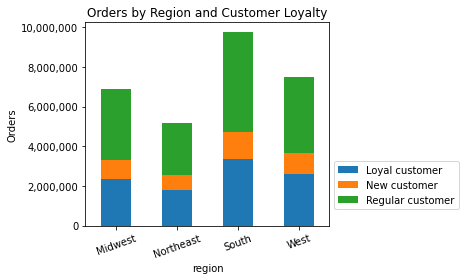

In [17]:
# Visualizing orders by region and customer loyalty - with thousands separator
crosstab_region_loyalty_flag = pd.crosstab(df_final['region'], df_final['loyalty_flag'], dropna = False)
bar_crosstab_region_loyalty = crosstab_region_loyalty_flag.plot(kind = 'bar', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Orders by Region and Customer Loyalty')
plt.ylabel('Orders')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='y')
bar_crosstab_region_loyalty.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

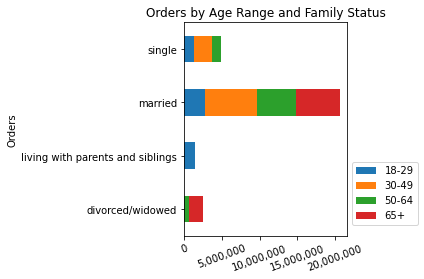

In [18]:
# Visualizing orders by age range and family status - with thousands separator
crosstab_family_status_age = pd.crosstab(df_final['family_status'], df_final['age_group'], dropna = False)
bar_crosstab_family_status_age = crosstab_family_status_age.plot(kind = 'barh', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Orders by Age Range and Family Status')
plt.ylabel('Orders')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='x')
bar_crosstab_family_status_age.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

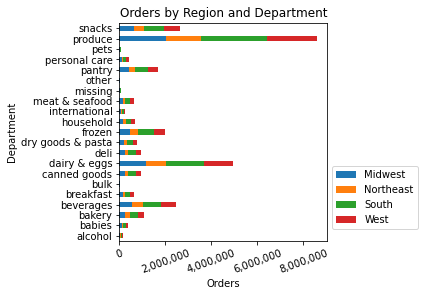

In [20]:
# Visualizing orders by region and department - with thousands separator
crosstab_department_region = pd.crosstab(df_final['department'], df_final['region'], dropna = False)
bar_crosstab_department_region = crosstab_department_region.plot(kind = 'barh', stacked = True, color = sns.color_palette())
plt.xticks(rotation = 20, horizontalalignment = "center")
plt.title('Orders by Region and Department')
plt.ylabel('Department')
plt.xlabel('Orders')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.2))
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='x')
bar_crosstab_department_region.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))